# Exercise 2

In this exercise, there are two tasks  related to creating neural networks. The purpose of the tasks is to get acquainted with regression using neural networks, i.e. to create a model that predicts different order equations.

Both Tasks have a conclusion cell, in which you can write down the summary how different configuration (epochs, number of hidden layers, number of nodes in hidden layers)  affects the results. 



## TASK 1

Purpose is to create neural network (MLP) to model the first order equation: 

$$ f(x) = 3x-1 $$



In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Generate dataset for the range [-2,3] with 100 sample

x = np.random.random_sample(100) * 5 - 2
y = 3 * x - 1

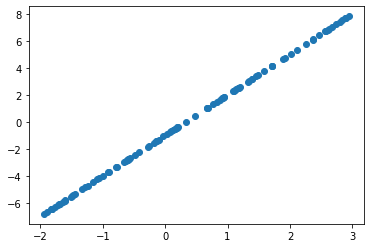

In [3]:
# Plot the sample

plt.scatter(x,y)

In [4]:
# Shuffle the dataset and split it:
# training set 80%
# test set 20%

# shuffle and split
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Using from_tensor_slices -function convert Numpy-tables to TensorFlow's Dataset class
train_dataset = tf.data.Dataset.from_tensor_slices((train_X,train_y))
test_dataset = tf.data.Dataset.from_tensor_slices((test_X,test_y))

# Define the batch size
train_dataset,test_dataset = train_dataset.batch(1), test_dataset.batch(1)


In [5]:
# print("Training Input shape\t: {}".format(train_X.shape))
# print("Testing Input shape\t: {}".format(test_X.shape))
# print("Training Output shape\t: {}".format(train_y.shape))
# print("Testing Output shape\t: {}".format(test_y.shape))

In [6]:
# Define neural network using Keras Function API
# Input layer = 1 node i.e. one feature, value of x-axis
# 1 hidden layer = 2-4 nodes. Dense without acivation function = default linear activation 
# function. That enough because we model linear equation. 
# Output layer = 1 node (due to regression, only one node is enought in the output layer)

model = keras.Sequential(
    [
        layers.Dense(1, input_shape=(1,)),
        layers.Dense(2),
        layers.Dense(1),
    ]
)

# Print the structure of model: model.summary()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Compile with following parameters
# optimizer='adam', 
# loss='mean_squared_error',
# metrics=['mae'])

model.compile(loss='mse', # Loss
              optimizer='adam', # Adam optimizer with default parameters
              metrics=['mae'] # mean absolute error
              # metrics=[['accuracy'], ['mae']] # Accuracy is used in classification problems, 
                                                # but here we have a regression problem -> mae
             )

In [8]:
# Fit model with 
# epochs: 100, 200, 300
# Implementation comes this cell

model.fit(train_dataset, epochs = 200)

Epoch 1/200
80/80 [==============================] - 0s 543us/step - loss: 22.2471 - mae: 4.0776
Epoch 2/200
80/80 [==============================] - 0s 575us/step - loss: 21.2587 - mae: 3.9885
Epoch 3/200
80/80 [==============================] - 0s 563us/step - loss: 20.5628 - mae: 3.9242
Epoch 4/200
80/80 [==============================] - 0s 525us/step - loss: 20.0755 - mae: 3.8785
Epoch 5/200
80/80 [==============================] - 0s 565us/step - loss: 19.7274 - mae: 3.8456
Epoch 6/200
80/80 [==============================] - 0s 550us/step - loss: 19.4644 - mae: 3.8205
Epoch 7/200
80/80 [==============================] - 0s 562us/step - loss: 19.2364 - mae: 3.7984
Epoch 8/200
80/80 [==============================] - 0s 550us/step - loss: 18.9837 - mae: 3.7738
Epoch 9/200
80/80 [==============================] - 0s 550us/step - loss: 18.6202 - mae: 3.7380
Epoch 10/200
80/80 [==============================] - 0s 592us/step - loss: 18.0059 - mae: 3.6768
Epoch 11/200
80/80 [=========

Epoch 80/200
80/80 [==============================] - 0s 546us/step - loss: 3.1561e-12 - mae: 1.4822e-06
Epoch 81/200
80/80 [==============================] - 0s 581us/step - loss: 2.5010e-12 - mae: 1.2902e-06
Epoch 82/200
80/80 [==============================] - 0s 556us/step - loss: 2.2453e-12 - mae: 1.2523e-06
Epoch 83/200
80/80 [==============================] - 0s 550us/step - loss: 2.2351e-12 - mae: 1.2452e-06
Epoch 84/200
80/80 [==============================] - 0s 559us/step - loss: 2.2771e-12 - mae: 1.2635e-06
Epoch 85/200
80/80 [==============================] - 0s 536us/step - loss: 2.0181e-12 - mae: 1.1784e-06
Epoch 86/200
80/80 [==============================] - 0s 502us/step - loss: 1.7671e-12 - mae: 1.0924e-06
Epoch 87/200
80/80 [==============================] - ETA: 0s - loss: 3.6380e-12 - mae: 1.9073e-0 - 0s 562us/step - loss: 1.7130e-12 - mae: 1.0674e-06
Epoch 88/200
80/80 [==============================] - 0s 526us/step - loss: 1.6461e-12 - mae: 1.0298e-06
Epoch 89/

80/80 [==============================] - 0s 496us/step - loss: 2.8183e-11 - mae: 3.6418e-06
Epoch 155/200
80/80 [==============================] - 0s 529us/step - loss: 1.1287e-09 - mae: 2.1131e-05
Epoch 156/200
80/80 [==============================] - 0s 613us/step - loss: 1.7534e-07 - mae: 2.3630e-04
Epoch 157/200
80/80 [==============================] - 0s 574us/step - loss: 5.1262e-05 - mae: 0.0039
Epoch 158/200
80/80 [==============================] - 0s 547us/step - loss: 1.5213e-04 - mae: 0.0096
Epoch 159/200
80/80 [==============================] - 0s 533us/step - loss: 1.4619e-04 - mae: 0.0092
Epoch 160/200
80/80 [==============================] - 0s 559us/step - loss: 2.6543e-05 - mae: 0.0038
Epoch 161/200
80/80 [==============================] - 0s 582us/step - loss: 2.6954e-06 - mae: 0.0012
Epoch 162/200
80/80 [==============================] - 0s 547us/step - loss: 8.1118e-07 - mae: 7.0795e-04
Epoch 163/200
80/80 [==============================] - ETA: 0s - loss: 1.1511e-0

In [9]:
# Evaluate()
# Implementation comes this cell

results = model.evaluate(test_dataset)
print(results)
print(f"Mean absolute error: {results[1]}")

20/20 [==============================] - 0s 898us/step - loss: 4.6888e-10 - mae: 1.7343e-05
[4.688822108356305e-10, 1.7343461877317168e-05]
Mean absolute error: 1.7343461877317168e-05


In [10]:
# Predict using 30 sample from range [-2,3]

sample_x = np.random.random_sample(30) * 5 - 2
predicted_y = model.predict(sample_x)

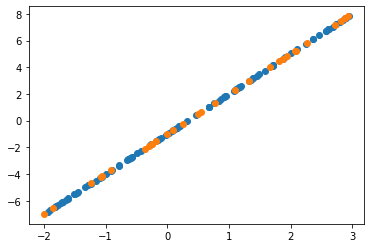

In [11]:
# Plot predicted values to same plot as the equation

plt.scatter(x,y)
plt.scatter(sample_x, predicted_y)
plt.show()

__Conclusion__

Short conclusion:
- How number of nodes in hidden layer affects the results?
- How the number of epochs affects the results?
- Etc.

As you can see below, quite small mae can be achieved with all combinations, but one occasinally gets values that are 10000 times bigger than the smallest error with any of these setups.

E.g. a sample of 100 numbers, two nodes and 100 epochs does not produce consistent trend (mae 0.0022 - 5.0887e-07) with three runs. With 200 and 300 epochs a bit more consistency could maybe be seen. But as I did not automate the testing, I am unable to estimate how large factor is blind luck.

Would be interesting to test, if I could get more consistency by scaling the data.

| New sample & split | Nodes in hidden layer | Epochs | Loss | MAE 
| --- | --- | -- | --- | --- | 
| 1st sample & split | 2 | 100 | 5.3418e-13 | 5.7276e-07  
| 1 | 2 | 200 | 2.1932e-09 | 4.0573e-05
| 1 | 2 | 300 | 1.0747e-13 | 2.0564e-07
| 1 | 3 | 100 | 4.5946e-13 | 5.3402e-07
| 1 | 3 | 200 | 1.1433e-05 | 0.0034
| 1 | 3 | 300 | 3.5394e-06 | 0.0015
| 1 | 4 | 100 | 1.5219e-13 | 2.4121e-07
| 1 | 4 | 200 | 1.0391e-05 | 0.0031
| 1 | 4 | 300 | 2.6859e-06 | 0.0015
| 2nd sample & split | 2 | 100 | 4.3708e-13 | 5.0887e-07  
| 2 | 2 | 100 | 3.1023e-10 | 1.5004e-05 
| 2 | 2 | 100 | 6.0316e-06 | 0.0022 
| 2 | 2 | 200 | 1.8035e-13 | 3.6620e-07
| 2 | 2 | 200 | 5.2701e-09 | 6.0839e-05
| 2 | 2 | 200 | 1.6416e-11 | 3.4757e-06
| 2 | 2 | 300 | 1.3352e-07 | 3.1962e-04
| 2 | 2 | 300 | 4.2637e-13 | 5.7966e-07
| 2 | 2 | 300 | 1.7977e-08 | 1.0783e-04


## TASK 2

Purpose is to create neural network (MLP) to model the cubic (third) order equation: 

$$ f(x) = 2x^3 + 3x^2 - 3x + 2 $$


In [12]:
# Generate dataset for the range [-2,3] with 1000 sample

x = np.random.random_sample(1000) * 5 - 2
y = 2 * x**3 + 3 * x**2 - 3 * x + 2 

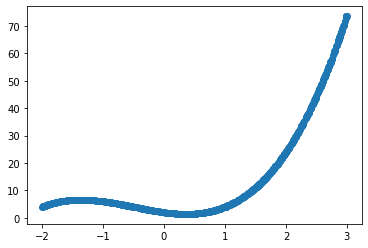

In [13]:
# Plot the sample

plt.scatter(x,y)

In [14]:
# Shuffle the dataset and split it:
# training set 80%
# test set 20%

# shuffle and split
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Using from_tensor_slices -function convert Numpy-tables to TensorFlow's Dataset class
train_dataset = tf.data.Dataset.from_tensor_slices((train_X,train_y))
test_dataset = tf.data.Dataset.from_tensor_slices((test_X,test_y))

# Define the batch size
train_dataset,test_dataset = train_dataset.batch(1), test_dataset.batch(1)

In [15]:
# Define a neural network using Keras Function API
# Input layer = 1 node
# 1-2 hidden layers = 4-8 nodes. Dense with 'relu' activation function in each hidden layer
# Cubic equation is nonlinear function, so we can't use linear activation function. 
# Output layer = 1 node (due to regression, only one node is enough in the output layer)

cubic_model = keras.Sequential(
    [
        layers.Dense(1, input_shape=(1,)),
        layers.Dense(8, activation = 'relu'),
        layers.Dense(8, activation = 'relu'),
        layers.Dense(1),
    ]
)

# Print the structure of model: model.summary()
cubic_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile with following parameters
# optimizer='adam', 
# loss='mean_squared_error',
# metrics=['mae'])

cubic_model.compile(loss='mean_squared_error', # Loss
              optimizer='adam', # Adam optimizer with default parameters
              metrics=['mae'] # mean absolute error
             )

In [17]:
# Fit model with 
# epochs: 50, 100, 200

cubic_model.fit(train_dataset, epochs=200)

Epoch 1/200
800/800 [==============================] - 0s 597us/step - loss: 321.4492 - mae: 9.6510
Epoch 2/200
800/800 [==============================] - 0s 548us/step - loss: 105.2600 - mae: 7.1289
Epoch 3/200
800/800 [==============================] - 0s 613us/step - loss: 83.8421 - mae: 6.5442
Epoch 4/200
800/800 [==============================] - 0s 583us/step - loss: 70.0035 - mae: 5.8230
Epoch 5/200
800/800 [==============================] - 0s 599us/step - loss: 56.6185 - mae: 5.0653
Epoch 6/200
800/800 [==============================] - 0s 569us/step - loss: 43.6446 - mae: 4.3423
Epoch 7/200
800/800 [==============================] - 0s 597us/step - loss: 33.4657 - mae: 3.7022
Epoch 8/200
800/800 [==============================] - ETA: 0s - loss: 26.0960 - mae: 3.17 - 1s 713us/step - loss: 25.5286 - mae: 3.1499
Epoch 9/200
800/800 [==============================] - 0s 597us/step - loss: 19.4313 - mae: 2.7116
Epoch 10/200
800/800 [==============================] - 0s 582us/step

800/800 [==============================] - 0s 615us/step - loss: 0.0499 - mae: 0.1543
Epoch 83/200
800/800 [==============================] - 0s 579us/step - loss: 0.0492 - mae: 0.1533
Epoch 84/200
800/800 [==============================] - 0s 530us/step - loss: 0.0490 - mae: 0.1530
Epoch 85/200
800/800 [==============================] - 0s 569us/step - loss: 0.0488 - mae: 0.1526
Epoch 86/200
800/800 [==============================] - 0s 585us/step - loss: 0.0483 - mae: 0.1518
Epoch 87/200
800/800 [==============================] - 0s 552us/step - loss: 0.0481 - mae: 0.1514
Epoch 88/200
800/800 [==============================] - 0s 596us/step - loss: 0.0480 - mae: 0.1510
Epoch 89/200
800/800 [==============================] - 0s 561us/step - loss: 0.0480 - mae: 0.1509
Epoch 90/200
800/800 [==============================] - 0s 560us/step - loss: 0.0471 - mae: 0.1492
Epoch 91/200
800/800 [==============================] - 0s 599us/step - loss: 0.0473 - mae: 0.1493
Epoch 92/200
800/800 [=

800/800 [==============================] - 1s 646us/step - loss: 0.0466 - mae: 0.1444
Epoch 164/200
800/800 [==============================] - 0s 565us/step - loss: 0.0466 - mae: 0.1443
Epoch 165/200
800/800 [==============================] - 0s 551us/step - loss: 0.0466 - mae: 0.1444
Epoch 166/200
800/800 [==============================] - 0s 535us/step - loss: 0.0466 - mae: 0.1444
Epoch 167/200
800/800 [==============================] - 0s 557us/step - loss: 0.0466 - mae: 0.1444
Epoch 168/200
800/800 [==============================] - 0s 558us/step - loss: 0.0466 - mae: 0.1444
Epoch 169/200
800/800 [==============================] - 0s 566us/step - loss: 0.0466 - mae: 0.1444
Epoch 170/200
800/800 [==============================] - 0s 569us/step - loss: 0.0466 - mae: 0.1444
Epoch 171/200
800/800 [==============================] - 0s 528us/step - loss: 0.0466 - mae: 0.1444
Epoch 172/200
800/800 [==============================] - 0s 560us/step - loss: 0.0466 - mae: 0.1444
Epoch 173/200


In [18]:
# Evaluate()

results = cubic_model.evaluate(test_dataset)
print(results)
print(f"Mean absolute error: {results[1]}")

200/200 [==============================] - 0s 511us/step - loss: 0.0194 - mae: 0.1009
[0.019445477053523064, 0.10090898722410202]
Mean absolute error: 0.10090898722410202


In [19]:
# Predict using 30 sample from range [-2,3]

sample_x = np.random.random_sample(30) * 5 - 2
predicted_y = cubic_model.predict(sample_x)


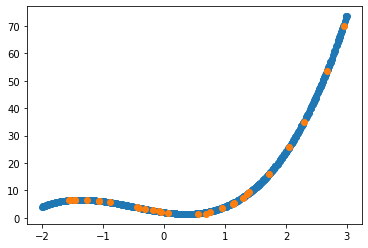

In [20]:
# Plot predicted values to same plot as the equation

plt.scatter(x,y)
plt.scatter(sample_x, predicted_y)
plt.show()

In [21]:
import pandas as pd

x = np.random.random_sample(1000) * 5 - 2
y = 2 * x**3 + 3 * x**2 - 3 * x + 2 

# shuffle and split
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Using from_tensor_slices -function convert Numpy-tables to TensorFlow's Dataset class
train_dataset = tf.data.Dataset.from_tensor_slices((train_X,train_y))
test_dataset = tf.data.Dataset.from_tensor_slices((test_X,test_y))

# Define the batch size
train_dataset,test_dataset = train_dataset.batch(10), test_dataset.batch(10)

# Define a neural network using Keras Function API
# Input layer = 1 node
# 1-2 hidden layers = 4-8 nodes. Dense with 'relu' activation function in each hidden layer
# Cubic equation is nonlinear function, so we can't use linear activation function. 
# Output layer = 1 node (due to regression, only one node is enough in the output layer)

def model_1_hidden_layer(n1, e):
    cubic_model = keras.Sequential(
        [
            layers.Dense(1, input_shape=(1,)),
            layers.Dense(n1, activation = 'relu'),
            layers.Dense(1),
        ]
    )

    cubic_model.compile(loss='mean_squared_error', # Loss
                  optimizer='adam', # Adam optimizer with default parameters
                  metrics=['mae'] # mean absolute error
                 )

    # Fit model with epochs
    cubic_model.fit(train_dataset, epochs = e, verbose=0) 

    # Evaluate()
    return cubic_model.evaluate(test_dataset)


def model_2_hidden_layers(n1, n2, e):
    cubic_model = keras.Sequential(
        [
            layers.Dense(1, input_shape=(1,)),
            layers.Dense(n1, activation = 'relu'),
            layers.Dense(n2, activation = 'relu'),
            layers.Dense(1),
        ]
    )

    cubic_model.compile(loss='mean_squared_error', # Loss
                  optimizer='adam', # Adam optimizer with default parameters
                  metrics=['mae'] # mean absolute error
                 )

    # Fit model with epochs
    cubic_model.fit(train_dataset, epochs = e, verbose=0) 

    # Evaluate()
    return cubic_model.evaluate(test_dataset)

# 2 hidden layers with 4-8 nodes
# Fit model with epochs: 50, 100, 200 
epokit = [50, 100, 200] 
nodet = [4, 5, 6, 7, 8]
nodet2 = [4, 5, 6, 7, 8]

df = pd.DataFrame(columns = ['layers','nodes1', 'nodes2', 'epochs', 'loss', 'mae'])

for n1 in nodet:
    for e in epokit:
        results = model_1_hidden_layer(n1, e + 1)
        df.loc[len(df.index)] = [1, n1, np.nan, e, results[0], results[1]]

for n1 in nodet:
    for n2 in nodet2:
        for e in epokit:
            results = model_2_hidden_layers(n1, n2, e + 1)
            df.loc[len(df.index)] = [2, n1, n2, e, results[0], results[1]]

20/20 [==============================] - 0s 723us/step - loss: 14.6632 - mae: 2.2959


20/20 [==============================] - 0s 606us/step - loss: 0.4462 - mae: 0.4546


In [72]:
# df.describe()

In [73]:
# df.corr()

In [71]:
# df.plot.scatter(x='mae', y='epochs')
# df.plot.scatter(x='mae', y='nodes1')
# df.plot.scatter(x='mae', y='nodes2')

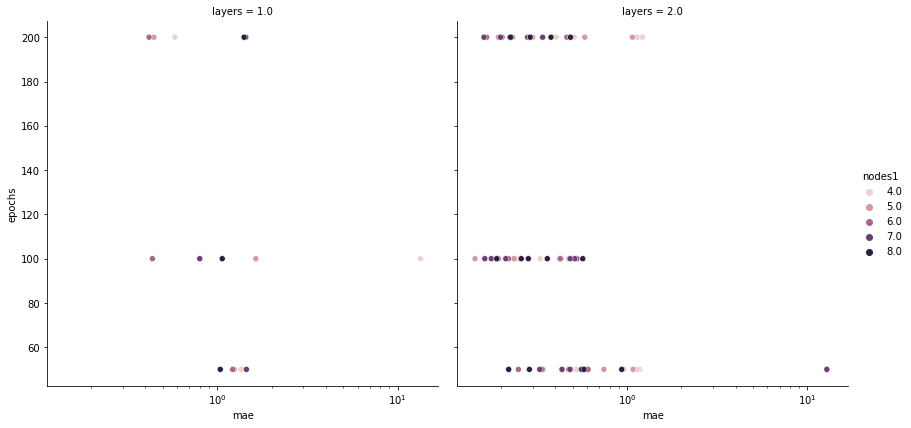

In [57]:
# Color indicates number of nodes in the first hidden layer
kuvaaja = sns.relplot(data = df, x = 'mae', y = 'epochs', hue = 'nodes1', col = 'layers', height=6) 
kuvaaja.set(xscale='log')

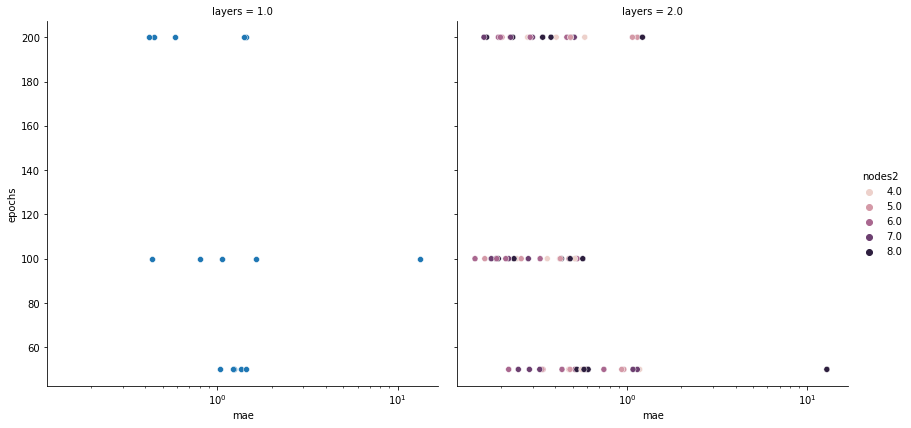

In [58]:
# Color indicates number of nodes in the second hidden layer
kuvaaja2 = sns.relplot(data = df, x = 'mae', y = 'epochs', hue = 'nodes2', col = 'layers', height = 6)
kuvaaja2.set(xscale='log')

In [60]:
df.groupby('layers')['mae'].describe()

,count,mean,std,min,25%,50%,75%,max
layers,,,,,,,,
1.0,15.0,1.862969,3.218822,0.418567,0.691167,1.218014,1.423843,13.403071
2.0,75.0,0.782184,2.021154,0.143294,0.246829,0.432246,0.543747,12.808194


In [70]:
# df.groupby(['epochs', 'nodes1'])['mae'].describe()
df.groupby(['epochs', 'nodes2'])['mae'].describe()

count      mean       std       min       25%       50%  \
epochs nodes1                                                            
50.0   4.0       6.0  0.944367  0.351901  0.513922  0.634467  1.048743   
       5.0       6.0  2.803065  4.912183  0.341738  0.639430  0.910297   
       6.0       6.0  0.579620  0.342788  0.249235  0.371469  0.532758   
       7.0       6.0  2.678057  4.979357  0.327599  0.446828  0.523154   
       8.0       6.0  0.602580  0.331157  0.220236  0.355111  0.567867   
100.0  4.0       6.0  2.568008  5.309032  0.244422  0.354929  0.456639   
       5.0       6.0  0.527407  0.563278  0.143294  0.199341  0.355548   
       6.0       6.0  0.371084  0.133535  0.192929  0.270737  0.424255   
       7.0       6.0  0.390995  0.253192  0.162384  0.185360  0.347631   
       8.0       6.0  0.454149  0.326642  0.189168  0.264695  0.321941   
200.0  4.0       6.0  0.722825  0.357646  0.404453  0.491570  0.545744   
       5.0       6.0  0.470137  0.327321  0.193140  0.248575  0.372026   
       6.0       6.0  0.369354  0.145737  0.166126  0.256490  0.440774   
       7.0       6.0  0.451370  0.488500  0.160682  0.218788  0.284881   
       8.0       6.0  0.501709  0.455052  0.223591  0.241832  0.333957   

                    75%        max  
epochs nodes1                       
50.0   4.0     1.164598   1.355202  
       5.0     1.201616  12.808194  
       6.0     0.603627   1.218014  
       7.0     1.229465  12.808145  
       8.0     0.844121   1.039112  
100.0  4.0     0.508846  13.403071  
       5.0     0.482423   1.638065  
       6.0     0.434144   0.528062  
       7.0     0.504817   0.799842  
       8.0     0.515758   1.065865  
200.0  4.0     1.000329   1.215641  
       5.0     0.547758   1.069872  
       6.0     0.475233   0.486668  
       7.0     0.327253   1.439641  
       8.0     0.458174   1.408045

In [62]:
df.groupby(['layers', 'epochs'])['mae'].describe()

count      mean       std       min       25%       50%  \
layers epochs                                                            
1.0    50.0      5.0  1.261289  0.155283  1.039112  1.218014  1.242937   
       100.0     5.0  3.468744  5.570712  0.436877  0.799842  1.065865   
       200.0     5.0  0.858873  0.519595  0.418567  0.445621  0.582492   
2.0    50.0     25.0  1.573587  3.392012  0.220236  0.435107  0.564317   
       100.0    25.0  0.341045  0.140910  0.143294  0.212316  0.329156   
       200.0    25.0  0.431920  0.295106  0.160682  0.225839  0.339898   

                    75%        max  
layers epochs                       
1.0    50.0    1.355202   1.451181  
       100.0   1.638065  13.403071  
       200.0   1.408045   1.439641  
2.0    50.0    0.933394  12.808194  
       100.0   0.481032   0.567449  
       200.0   0.485761   1.215641

__Conclusion__

Short conclusion:
- How number of nodes in hidden layer affects the results?
- How number of hidden layer affects the results?
- How the number of epochs affects the results?
- Etc.

In this model two hidden layers produce better results than one. The difference can be seen especially with lower number of epochs. The best results 

The effects of number of nodes vary. As the number of hidden layers seems to affect a lot, we get poorer results when looking at affect of nodes on first hidden layer. It looks like four nodes is too little and eight nodes is two much, especially for the second hidden layer. I would use six nodes for this model.

We get better results with 100 and 200 epochs than with 50. But when using two layers, results are ok even with 50 epochs.


In [54]:
from IPython.display import display, HTML
display(HTML(df.to_html()))

,layers,nodes1,nodes2,epochs,loss,mae
0,1.0,4.0,NaN,50.0,2.891329,1.355202
1,1.0,4.0,NaN,100.0,315.956421,13.403071
2,1.0,4.0,NaN,200.0,0.499191,0.582492
3,1.0,5.0,NaN,50.0,2.370035,1.242937
4,1.0,5.0,NaN,100.0,4.872654,1.638065
5,1.0,5.0,NaN,200.0,0.377910,0.445621
6,1.0,6.0,NaN,50.0,2.442790,1.218014
7,1.0,6.0,NaN,100.0,0.301849,0.436877
8,1.0,6.0,NaN,200.0,0.362387,0.418567
9,1.0,7.0,NaN,50.0,2.868794,1.451181
